<a href="https://colab.research.google.com/github/tonivirgili/datascience/blob/main/M5A11_Regressao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='BLUE'>Cientista de Dados na Prática </font>

# <font color='PURPLE'>Módulo 5 - Máquinas Preditivas</font>

## <font color='GREY'> Regressão </font>



# <font color='GREEN'>Regressão linear Simples - Preços do Diamante </font>




## 1° Problema de Negócio


Queremos Prever o Preço do Diamante de acordo com suas características.

In [ ]:
# Bibliotecas de Funções
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
# Fonte de Dados
df = pd.read_csv('/content/diamonds.csv')

In [ ]:
# Informações dos campos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
# Vendo as primeiras linhas
df.head(1)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


#2° Análise exploratória dos Dados

In [ ]:
# Estatística descritiva
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# Check for missing values
df.isna().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [ ]:
# Check for duplicate values
df.duplicated().sum()

np.int64(0)

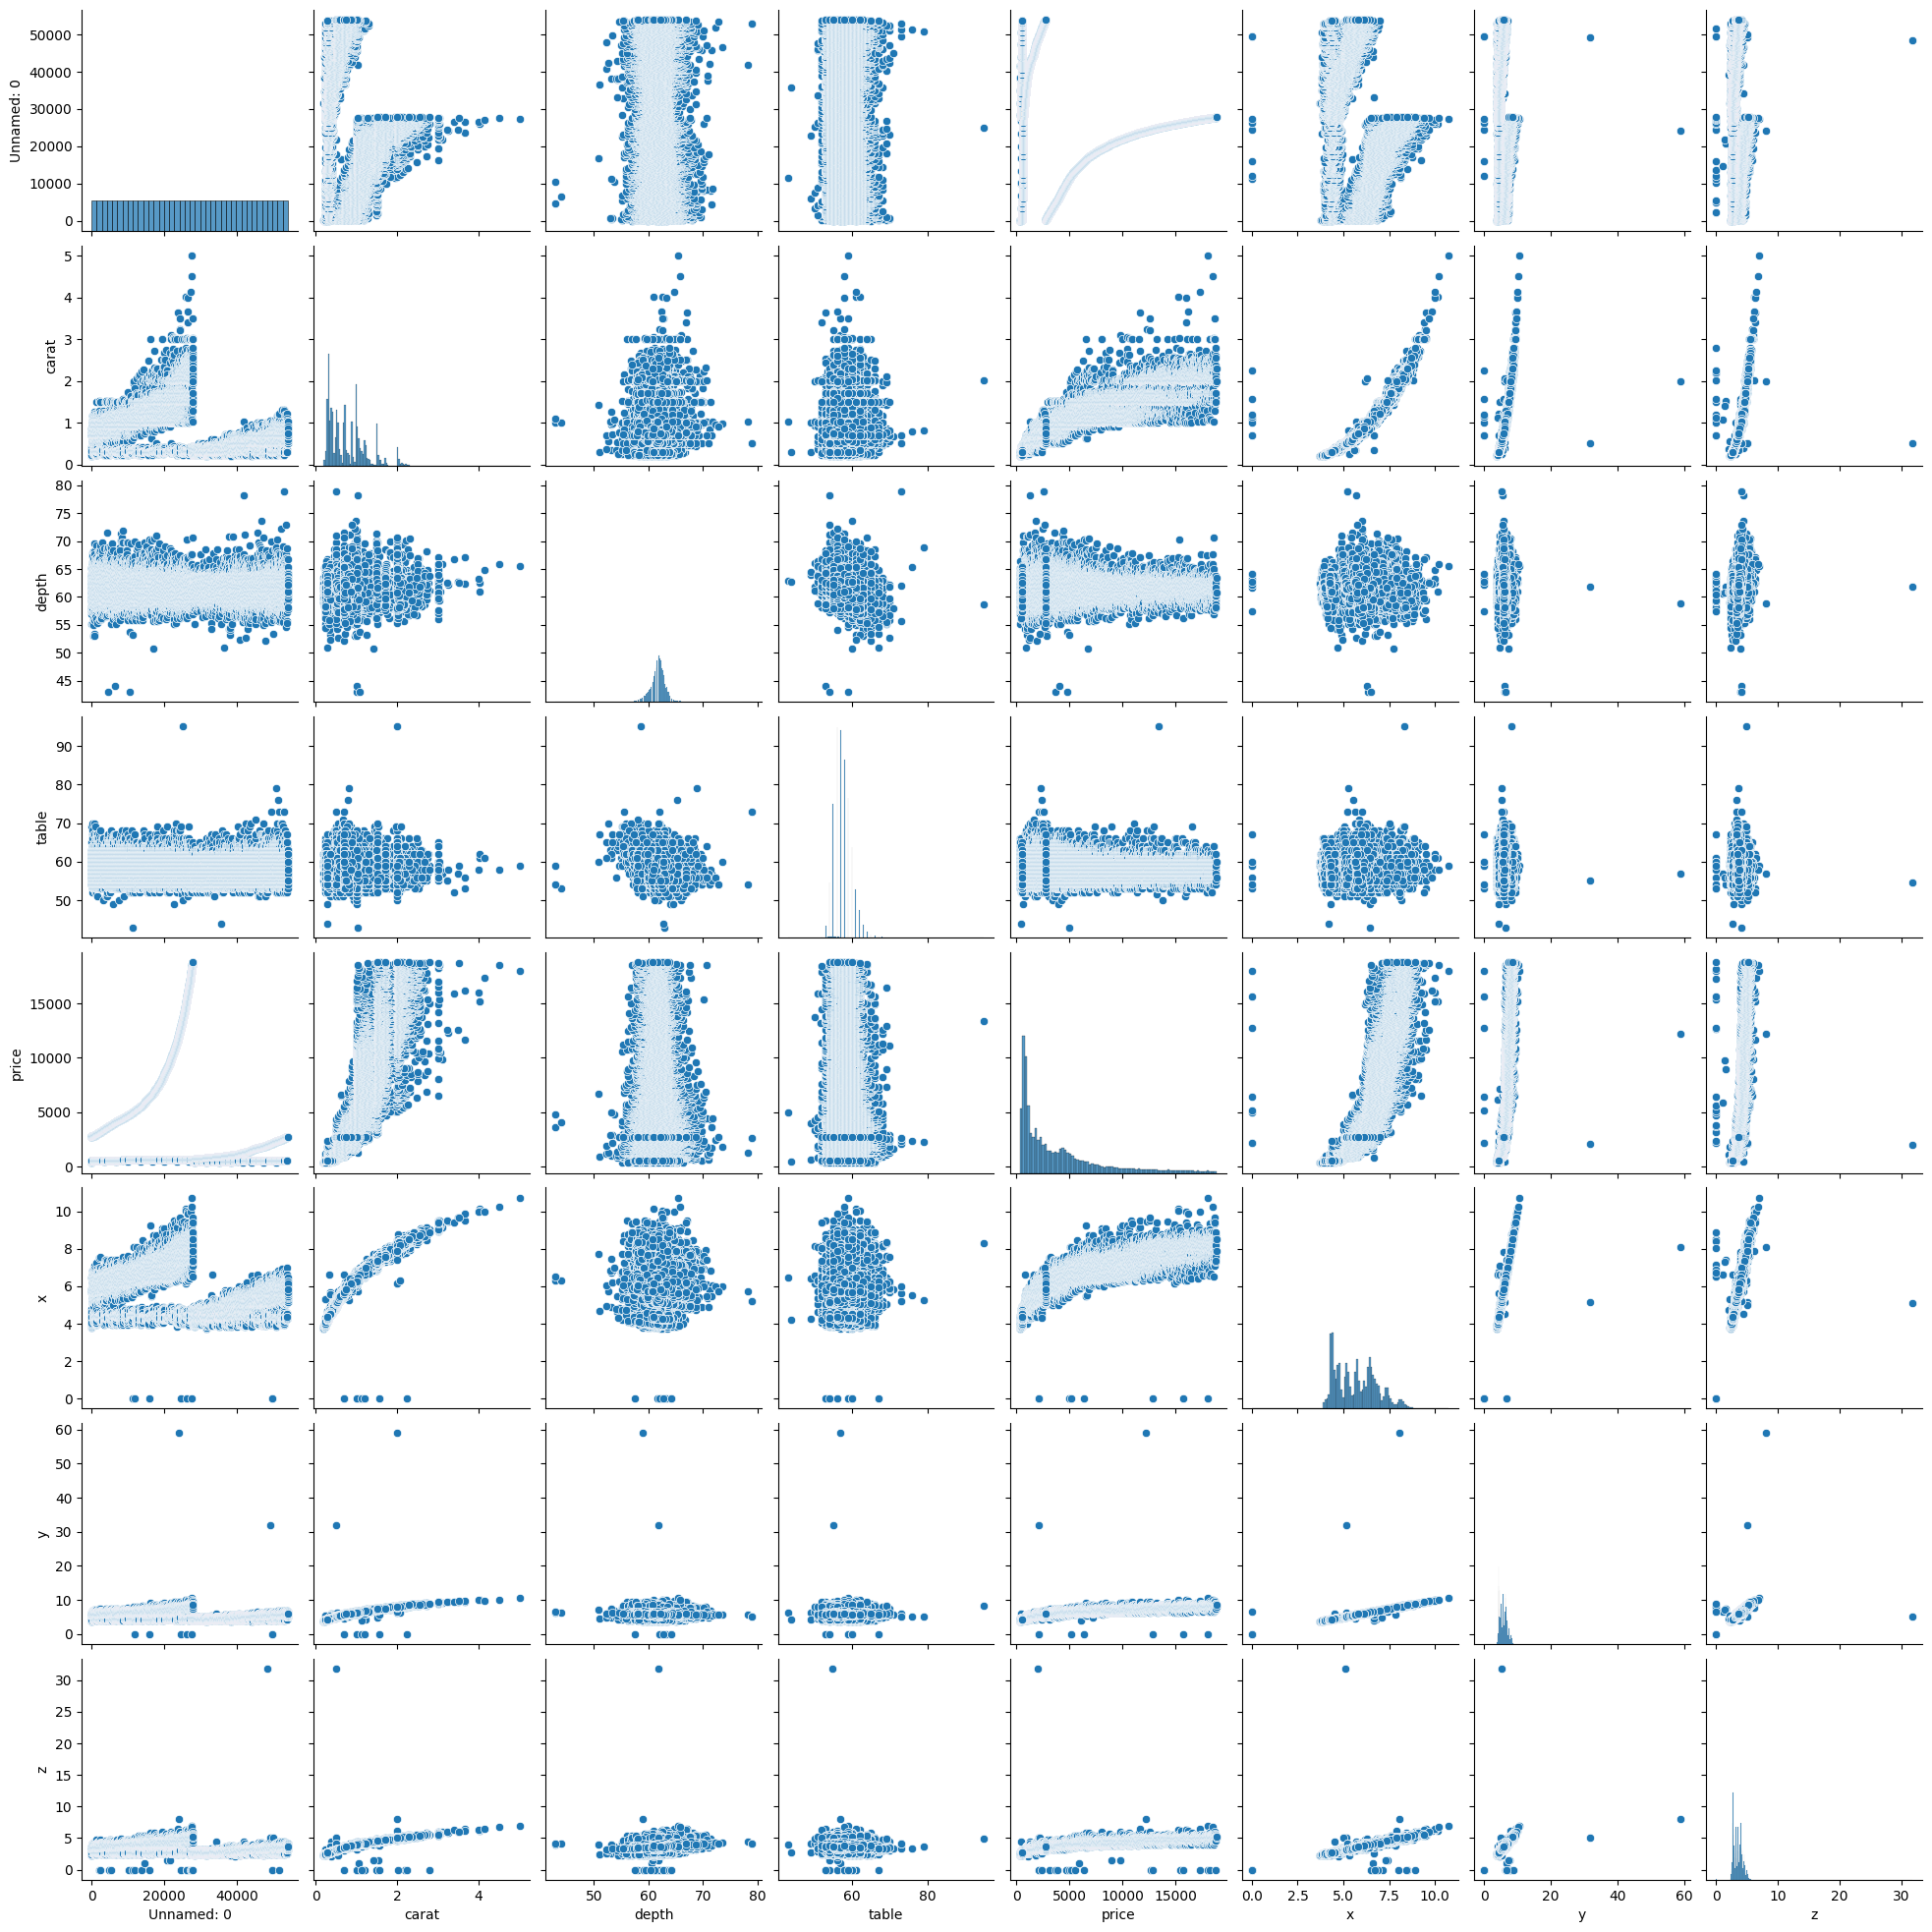

In [ ]:
# Explorando a Visualização dos Dados
# Usar o Matplotlib
sns.pairplot(df)

#3° Pré-Processamento dos Dados

Esta etapa normalmente leva mais tempo no ciclo, mas para nossos propósitos, a maioria dos conjuntos de dados escolhidos nesta série são limpos.

Os conjuntos de dados do mundo real são zoneados e incompletos. As escolhas que fazemos nesta etapa para resolver problemas de dados podem afetar as etapas posteriores e o próprio resultado.

Por exemplo, pode ser complicado lidar com dados ausentes quando não sabemos por que eles estão ausentes. Está faltando completamente ao acaso ou não?

Também pode ser complicado lidar com outliers se não entendermos o domínio e o contexto do problema o suficiente.

In [ ]:
# Split dataset into 80% train and 20% validation
X = df['carat'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#4° Criação da Máquina Preditiva
Criamos o modelo e ajustamos o modelo aos dados que preparamos para o treinamento.

Em seguida, passamos a fazer previsões com os dados que preparamos para validação.



In [ ]:
# Build model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Apply model to test data
y_predict = model.predict(X_test)

y_predict

array([[1854.32859447],
       [4730.28179803],
       [4574.82486811],
       ...,
       [1154.77240982],
       [1621.14319959],
       [4574.82486811]])

#5° Avaliando o Desempenho da Máquina Preditiva

Por fim, avaliamos a precisão do modelo. Para os fins deste exercício, paramos na métrica de precisão, mas existem outras métricas que podemos usar para avaliar o modelo, como erro médio absoluto, erro médio quadrático, erro médio quadrático médio, erro médio absoluto, R2 e assim por diante.

In [ ]:
# Compara valor real e valor predito
real_vs_predito = pd.DataFrame({'Real': y_test.flatten(), 'predito':y_predict.flatten()})
real_vs_predito.sample(3)

,Real,predito
1088,2188,2631.613244
6063,1376,1698.871665
9147,1956,1854.328594


In [ ]:
# Evaluate model - Avaliação da Acurácia do Modelo
print('Acurácia: %.2f' % (model.score(X_test, y_test)*100), '%' )

Acurácia: 84.70 %


# <font color='Blue'>Principais Conceitos em Regressão </font>


### O que é Regressão?

Vamos começar o módulo compreendendo o que é Regressão.

Em diversos problemas das áreas médica, biológica, industrial, química, finanças, engenharia entre outras, é de grande interesse verificar se duas ou mais variáveis estão relacionadas de alguma forma. Para expressar esta relação é muito importante estabelecer um modelo matemático. Esse tipo de modelagem ajuda a entender como determinadas variáveis influenciam outra variável, ou seja, verifica como o comportamento de uma(s) variável(is) pode mudar o comportamento de outra. Vamos estudar os principais conceitos ligados à regressão.

A regressão linear ajuda a prever o valor de uma variável desconhecida (uma variável contínua) com base em um valor conhecido. Uma aplicação poderia ser: “Qual é preço de uma casa com base em seu tamanho?”

O preço é o valor que queremos prever, com base no tamanho da casa.

Para resolver esse problema, teríamos que buscar dados históricos de tamanho e preço de casa, treinar um modelo, aprender a relação matemática entre os dados e então fazer a previsão de preços com base em outros tamanhos de casa. Dado que estamos analisando o histórico para estimar um novo preço, ele se torna um problema de regressão. O fato de preço e tamanho estarem linearmente relacionados (quanto maior o tamanho da casa) o torna um problema de regressão linear.

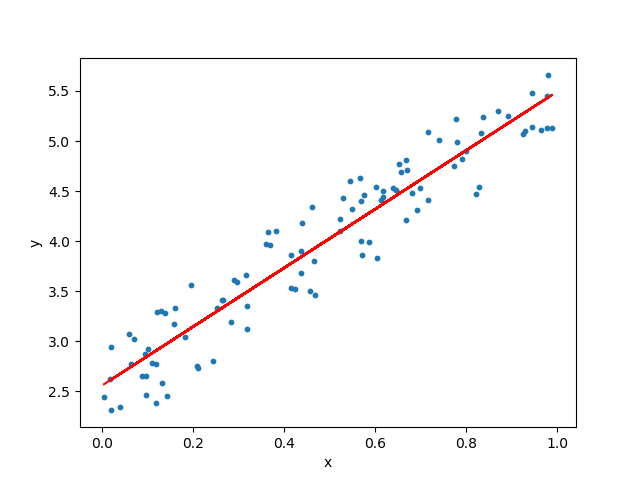

In [ ]:
from IPython.display import Image
Image('imagens/regression1.png')

### Variáveis Dependente e Independente

Uma variável dependente é o valor que estamos prevendo e uma variável independente é a variável que estamos usando para prever uma variável dependente. Por exemplo, a temperatura é diretamente proporcional ao número de sorvetes comprados. À medida que a temperatura aumenta, o número de sorvetes comprados também aumenta. Aqui a temperatura é a variável independente e, com base nela, o número de sorvetes comprados (a variável dependente) é previsto.

Uma variável independente x, explica a variação em outra variável, que é chamada variável dependente y. Este relacionamento existe em apenas uma direção: variável independente (x) --> variável dependente (y)

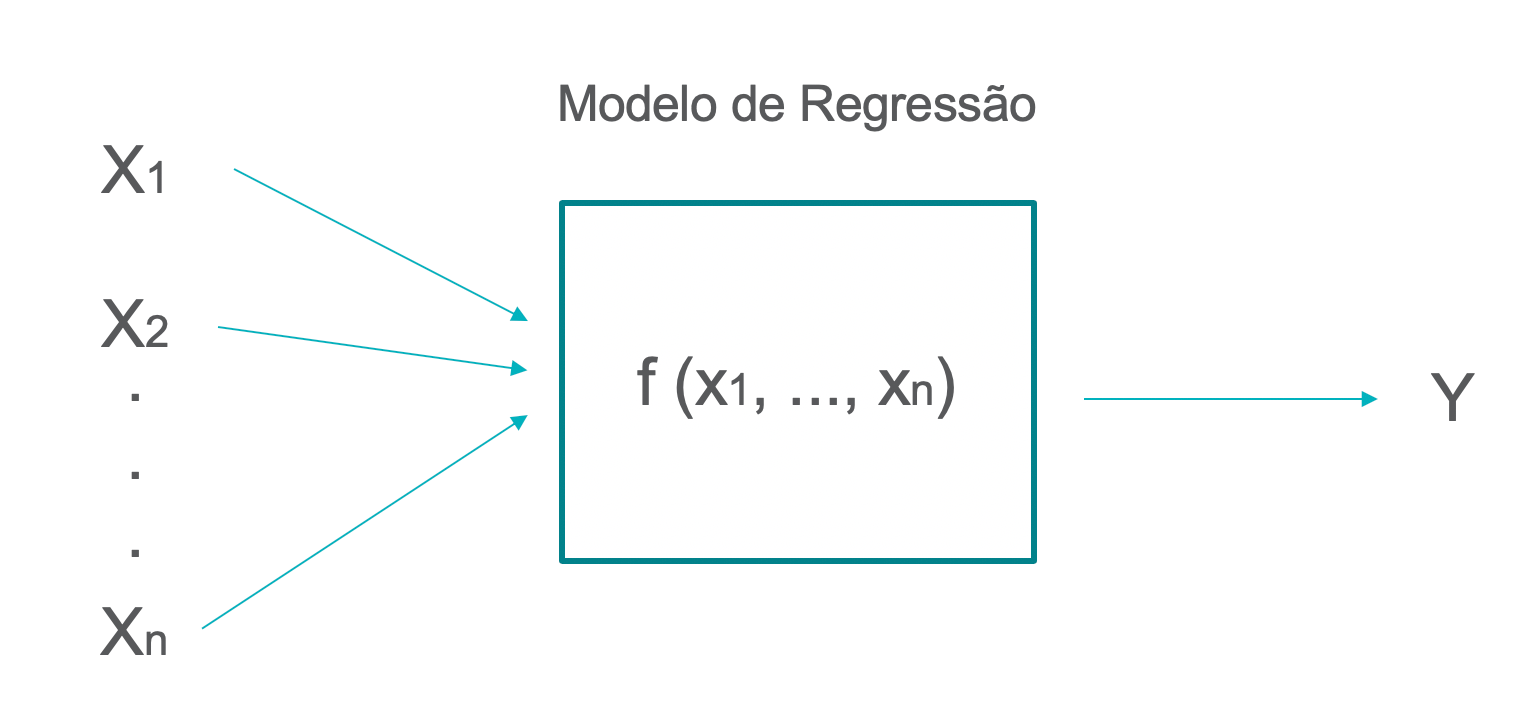

In [ ]:
from IPython.display import Image
Image('imagens/regression2.png')

### O Que Representa a Correlação?

Do exemplo anterior, podemos notar que as compras de sorvete estão diretamente correlacionadas (ou seja, elas se movem na mesma direção) com a temperatura.

Neste exemplo, a correlação é positiva: à medida que a temperatura aumenta, as vendas de sorvete aumentam. Em outros casos, a correlação pode ser negativa: por exemplo, as vendas de um item podem aumentar à medida que o preço do item diminui.

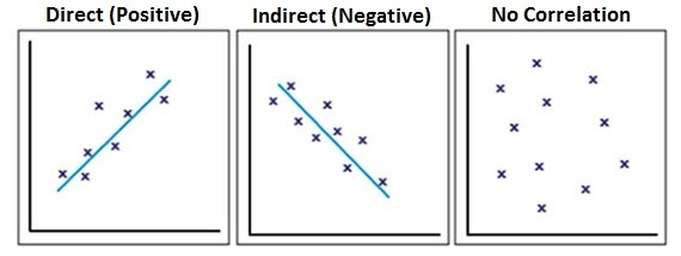

In [ ]:
from IPython.display import Image
Image('imagens/correlation1.jpg')

### Correlação Não Implica Causalidade

No entanto, intuitivamente, podemos dizer com confiança que a temperatura não é controlada pela venda de sorvetes, embora o inverso seja verdadeiro. Isso traz à tona o conceito de causalidade, qual evento influencia outro evento. A temperatura influencia as vendas de sorvete - mas não vice-versa.

Análise de regressão é uma metodologia estatística que utiliza a relação entre duas ou mais variáveis quantitativas de tal forma que uma variável possa ser predita a partir de outra, mas isso não implica causalidade. Ou seja, porque existe correlação entre duas variáveis não significa que uma é a causa da outra!

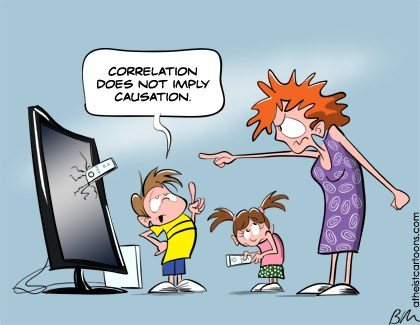

In [ ]:
from IPython.display import Image
Image('imagens/correlation2.png')

### Tipos de Modelos de Regressão

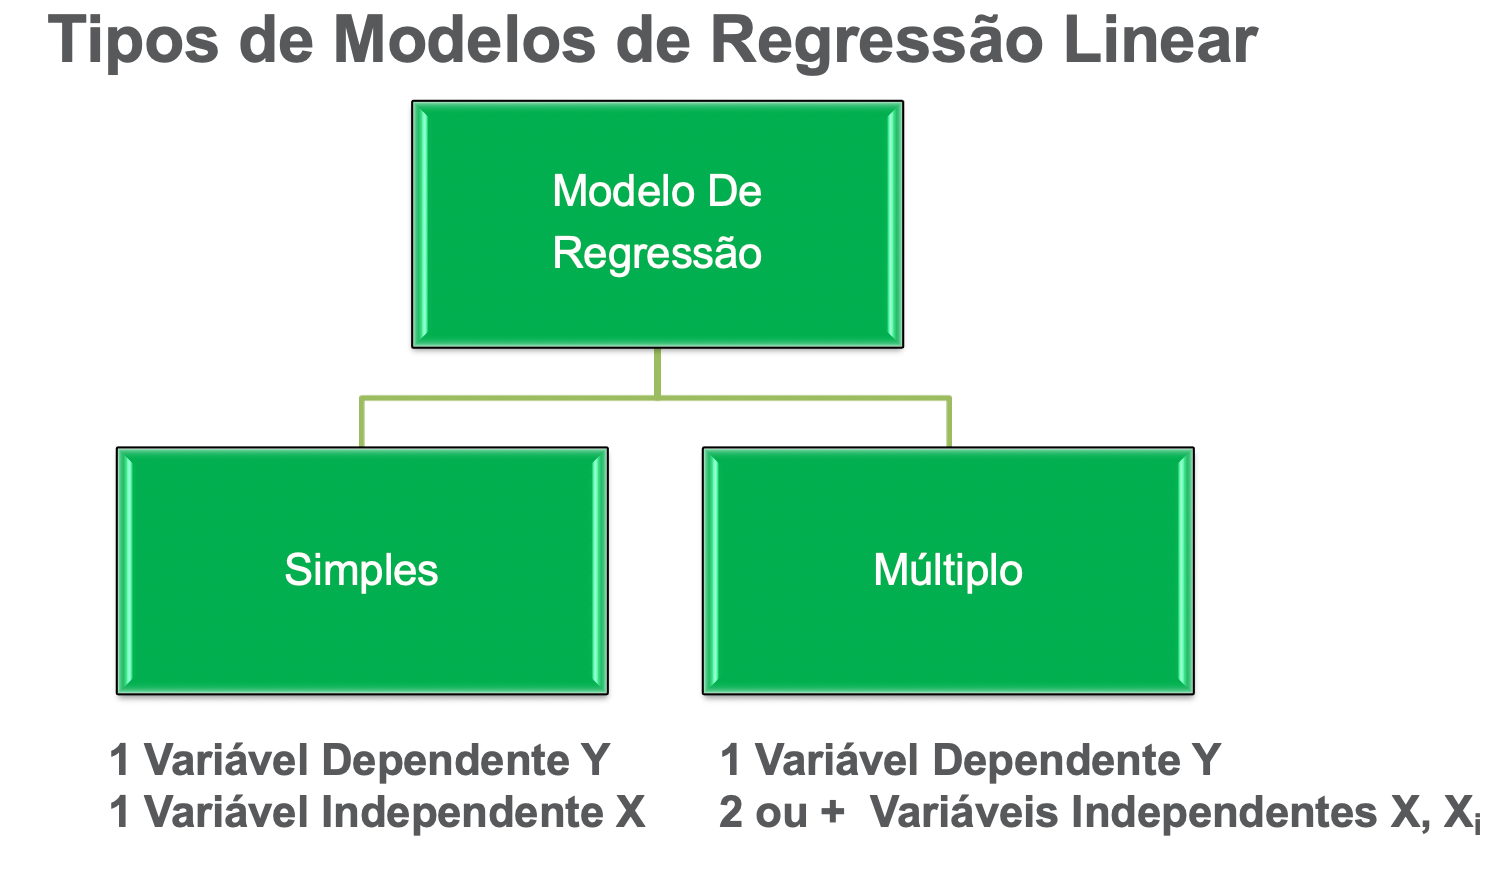

In [ ]:
from IPython.display import Image
Image('imagens/regression3.png')

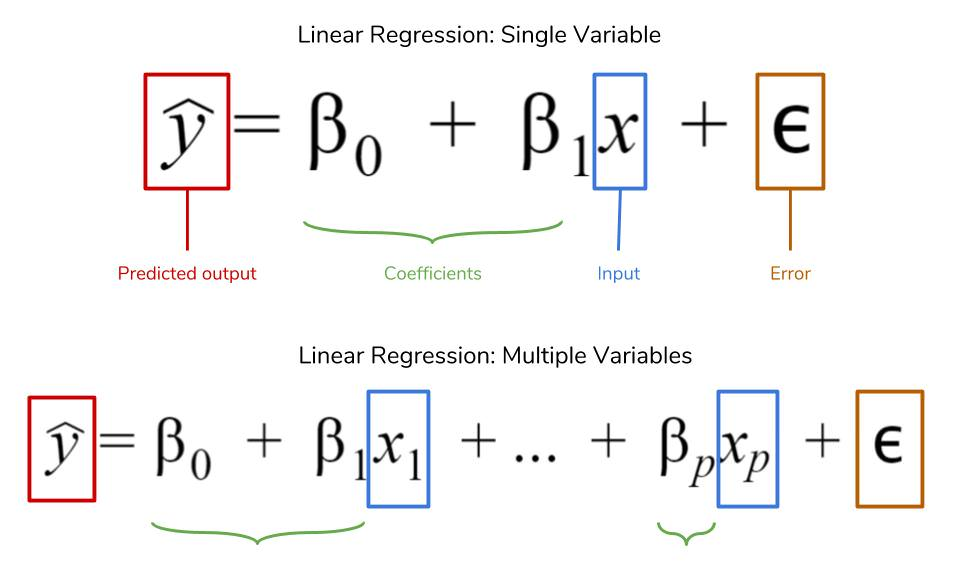

In [ ]:
from IPython.display import Image
Image('imagens/tipos.jpg')

### Formalizando a Regressão Linear Simples

Agora que temos os termos básicos definidos, vamos nos aprofundar nos detalhes da regressão linear.

Uma regressão linear simples é representada pela equação abaixo:

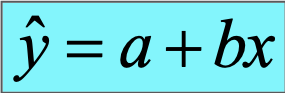

In [ ]:
from IPython.display import Image
Image('imagens/formula-regression.png')

Onde:
    
* y é a variável dependente que estamos prevendo.
* x é a variável independente.
* a é o termo de viés.
* b é a inclinação da variável (o peso atribuído à variável independente).

Y e X são as variáveis dependente e independente respectivamente. Vamos focar nos coeficientes (a e b na equação anterior).

Começamos com o coeficiente a, também chamado de viés ou bias. Considere o exemplo:

Queremos estimar o peso de um bebê pela idade do bebê em meses. Assumiremos que o peso de um bebê depende exclusivamente de quantos meses ele tem. O bebê tem 3 kg ao nascer e seu peso aumenta a uma taxa constante de 0,75 kg por mês. No final de um ano (12 meses), o gráfico do peso do bebê seria assim:

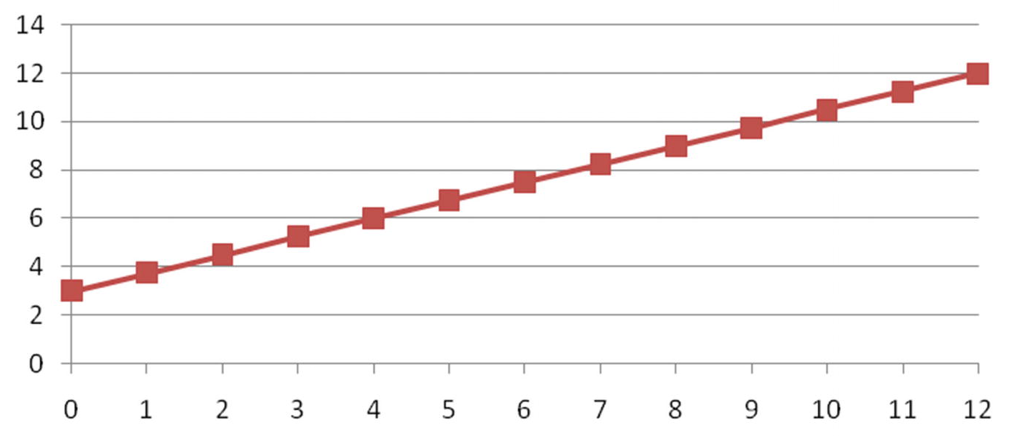

In [ ]:
from IPython.display import Image
Image('imagens/regression4.png')

No gráfico, o peso do bebê começa em 3 (a, o viés) e aumenta linearmente em 0,75 (b, a inclinação) a cada mês. Observe que, um termo de viés é o valor da variável dependente quando todas as variáveis independentes são 0.

A inclinação (ou slope) de uma linha é a diferença entre as coordenadas x e y nos dois extremos da linha e no comprimento da linha. No exemplo anterior, o valor da inclinação (b) é o seguinte:

(Diferença entre as coordenadas y nos dois extremos) / (Diferença entre as coordenadas x nos dois extremos)


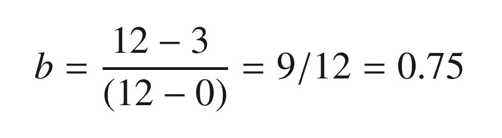

In [ ]:
from IPython.display import Image
Image('imagens/slope.png')

### Solução de uma Regressão Linear Simples

Vimos um exemplo simples de como a saída de uma regressão linear simples pode parecer (resolvendo viés e inclinação). Vamos agora encontrar uma maneira mais generalizada de gerar uma linha de regressão. O conjunto de dados fornecido é o seguinte:

In [ ]:
import pandas as pd
df = pd.read_csv('dados/pesos.csv')

In [ ]:
print(df)

    Idade  Peso
0       0  3.44
1       1  4.39
2       2  4.49
3       3  4.78
4       4  5.23
5       5  6.00
6       6  6.18
7       7  7.03
8       8  7.18
9       9  7.50
10     10  8.59
11     11  8.99
12     12  9.54


Dado que estamos estimando o peso do bebê com base em sua idade, a regressão linear pode ser construída da seguinte maneira:

y = a + bx

Vamos resolver o problema a partir dos primeiros registros. Vamos supor que o conjunto de dados tenha apenas 2 pontos de dados. A modelagem ficaria assim:

Cálculo para o primeiro mês:
* y = a + b*x
* 3.44 = a + b*(0)
* a = 3.44

Cálculo para o segundo mês:
* y = a + b*x
* 4.39 = a + b*(1)
* 4.39 = 3.44 + b*(1)
* b = 4.39 - 3.44
* b = 0.95

As linhas anteriores já representam o treinamento do modelo e fomos capazes de prever os valores de a e b, nesse caso, a = 3.44 e b = 0.95. Isso é o que o modelo aprende durante o treinamento!

Se aplicarmos os valores de a e b nos demais pontos de dados restantes acima, conseguimos ter como resultado exatamente o valor de y. No entanto, isso provavelmente não seria o caso na prática, porque a maioria dos dados reais não tem uma relação assim tão perfeita. Por isso precisamos treinar o modelo com mais dados e encontrar uma formação mais genérica.

### Método dos Mínimos Quadrados

No cenário anterior, vimos que os coeficientes são obtidos usando apenas dois pontos de dados do conjunto total de dados - ou seja, não consideramos a maioria das observações na elaboração de valores ótimos de a e b. Para evitar deixar de fora a maioria dos pontos de dados durante a construção da equação, podemos modificar o objetivo para minimizar o erro quadrático geral (mínimos quadrados comuns) em todos os pontos de dados.

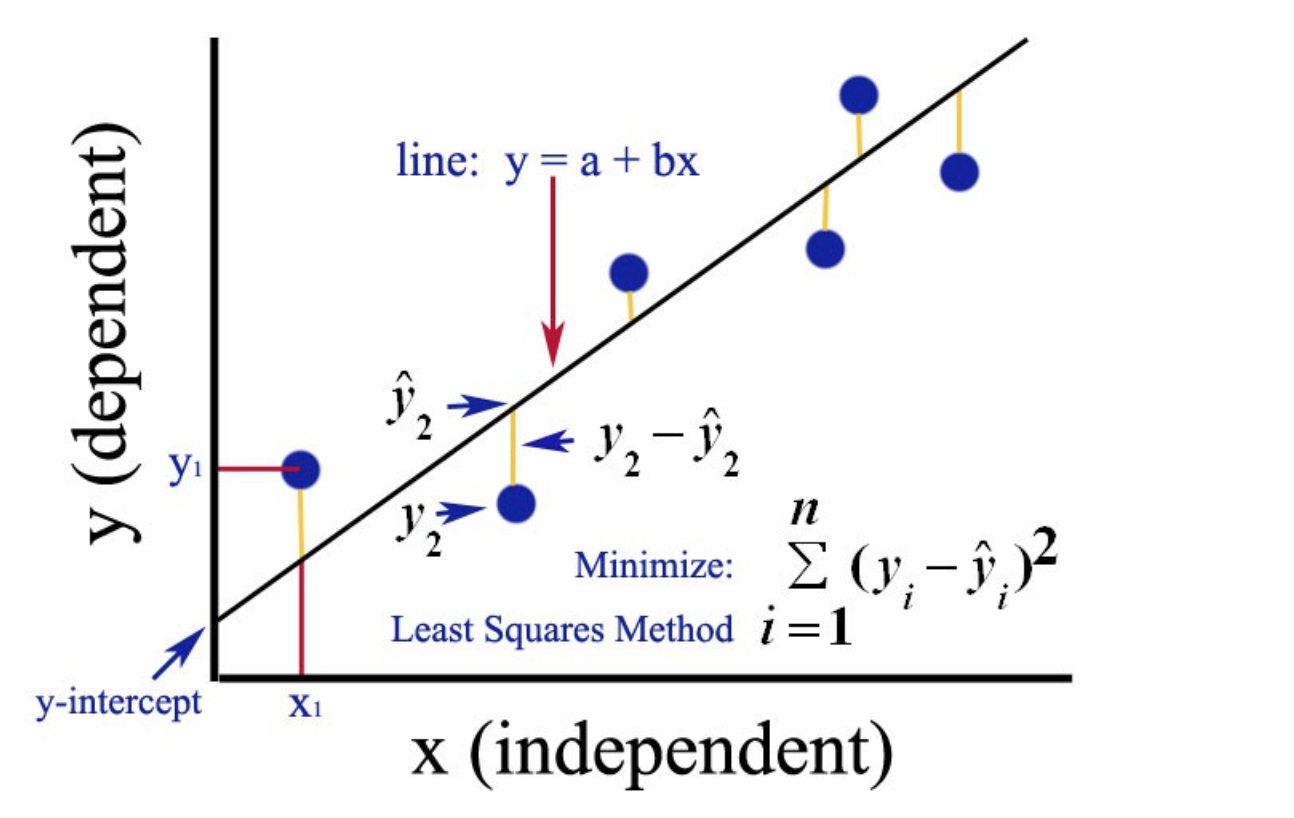

In [ ]:
from IPython.display import Image
Image('imagens/minimos-quadrados1.png')

### Minimizando a Soma Geral do Erro ao Quadrado

O Método dos Mínimos Quadrados é o método de computação matemática pelo qual se define a reta de regressão. Esse método definirá uma reta que minimizará a soma das distâncias ao quadrado entre os pontos plotados (X, Y) e a reta (que são os valores previstos de Y’).

O erro ao quadrado geral é definido como a soma da diferença ao quadrado entre os valores reais e previstos de todas as observações. A razão pela qual consideramos o valor do erro ao quadrado e não o valor real do erro é que não queremos erro positivo em alguns pontos de dados compensando erros negativos em outros pontos de dados.

Por exemplo, um erro de +5 em três pontos de dados compensa um erro de –5 em três outros pontos de dados, resultando em um erro geral de 0 entre os seis pontos de dados combinados. O erro quadrático converte o erro –5 dos três últimos pontos de dados em um número positivo, para que o erro quadrático geral se torne 6 × 5^2 = 150. Isso levanta uma questão: por que devemos minimizar o erro quadrático geral? O princípio é o seguinte:

1. O erro geral é minimizado se cada ponto de dados individual for previsto corretamente.

2. Em geral, a superpredição em 5% é tão ruim quanto a subpredição em 5%, portanto, consideramos o erro ao quadrado.

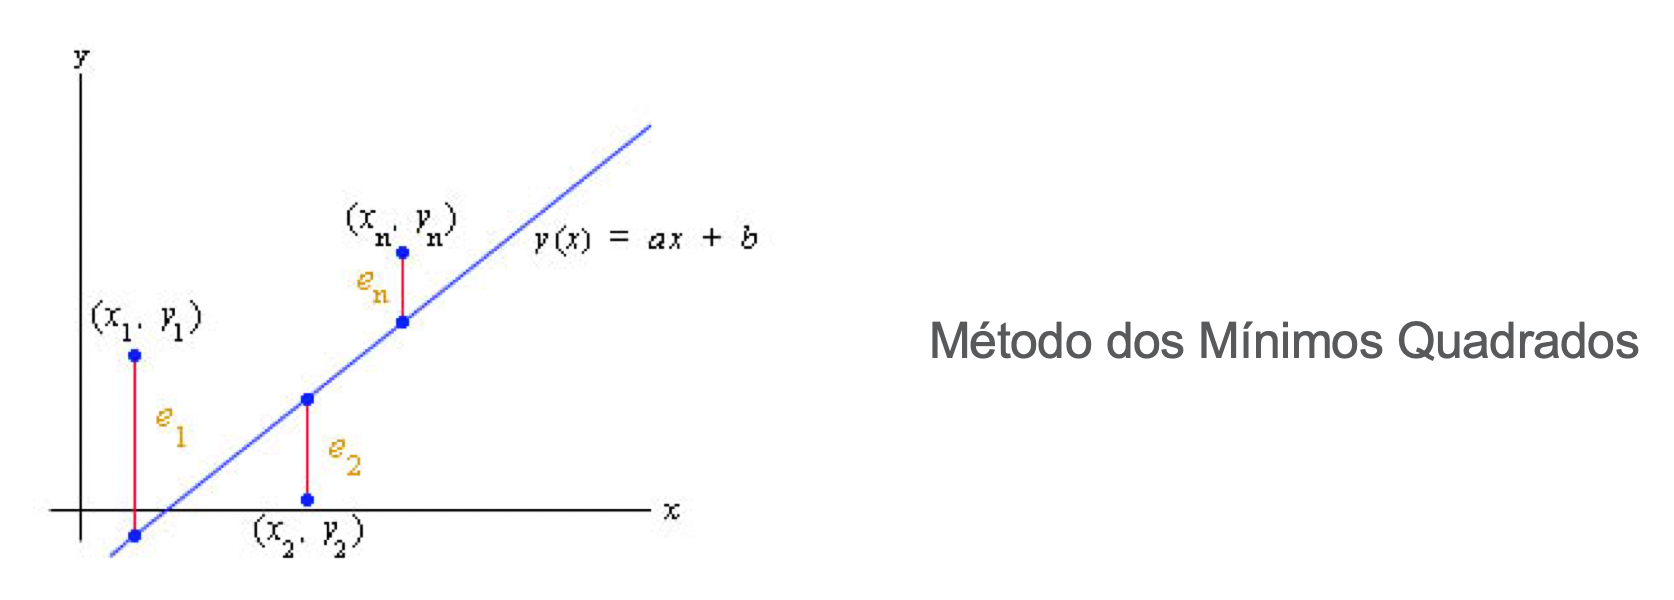

In [ ]:
from IPython.display import Image
Image('imagens/minimos-quadrados2.png')

Pelo método dos mínimos quadrados calculam-se os parâmetros “a“ e “b” da reta que minimiza estas distâncias ou as diferenças (ou o erro) entre Y e Y’. Esta reta é chamada de reta de regressão. Para que a soma dos quadrados dos erros tenha um valor mínimo, devem-se aplicar os conceitos de cálculo diferencial com derivadas parciais. Como as incógnitas do problema são os coeficientes "a" e "b" estrutura-se um sistema de duas equações. Assim aplicando os conceitos acima referidos monta-se o sistema de equações normais que permitirá extrair os valores de a e b.

A reta de regressão que se obtém através do método dos mínimos quadrados é apenas uma aproximação da realidade, ela é um modo útil para indicar a tendência dos dados. Mas até que ponto a reta de regressão obtida é útil para avaliar a realidade? Duas medidas podem indicar o quanto útil ou aproximado da realidade é a reta:

* Erro padrão da estimativa
* Coeficiente de determinação

### Erro Padrão da Estimativa

O erro padrão da regressão (S), também conhecido como erro padrão da estimativa, representa a distância média em que os valores observados "caem" da linha de regressão. Convenientemente, ele mostra o quão errado o modelo de regressão está, em média, usando as unidades da variável de resposta. Valores menores são melhores porque indica que as observações estão mais próximas da linha ajustada.

S mede a precisão das previsões do modelo. O erro padrão da estimativa é usado junto com o R Squared (Coeficiente de Determinação) na seção de ajuste da maioria dos resultados estatísticos. Ambas as medidas fornecem uma avaliação numérica de quão bem um modelo se ajusta aos dados da amostra. No entanto, existem diferenças entre as duas estatísticas.

O erro padrão da regressão fornece a medida absoluta da distância típica em que os pontos de dados "caem" da linha de regressão. S está nas unidades da variável dependente.

O R Squared fornece a medida relativa da porcentagem da variação da variável dependente explicada pelo modelo. O R Squared pode variar de 0 a 100%.

### Coeficiente de Determinação

O coeficiente de determinação (R Squared) deve ser interpretado como a proporção de variação total da variável dependente Y que é explicada pela variação da variável independente X.

O coeficiente de determinação é igual ao quadrado do coeficiente de correlação. Assim a partir do valor do coeficiente de determinação podemos obter o valor do coeficiente de correlação. O coeficiente de determinação é sempre positivo, enquanto que o coeficiente de correlação pode admitir valores entre -1 e +1. Valor igual a 1 indica perfeito relacionamento positivo, enquanto valor igual a -1 indica perfeito relacionamento negativo. Valores próximos de zero indicam que não há correlação.

O coeficiente de determinação indica o quanto a reta de regressão explica o ajuste da reta, enquanto que o coeficiente de correlação deve ser usado como uma medida de força da relação entre as variáveis.

Para mensurarmos o poder explicativo de um determinado modelo de regressão, ou o percentual de variabilidade da variável Y que é explicado pelo comportamento de variação das variáveis preditoras, precisamos entender alguns importantes conceitos.

Soma Total dos Quadrados (STQ ou SST) – Mostra a variação em Y em torno da própria média.

Soma dos Quadrados de Regressão (SQR) – Oferece a variação de Y considerando as variáveis X utilizadas no modelo.

Soma dos Quadrados dos Resíduos (SQU ou SSE) – Variação de Y que não é explicada pelo modelo elaborado.

STQ = SQR + SQU

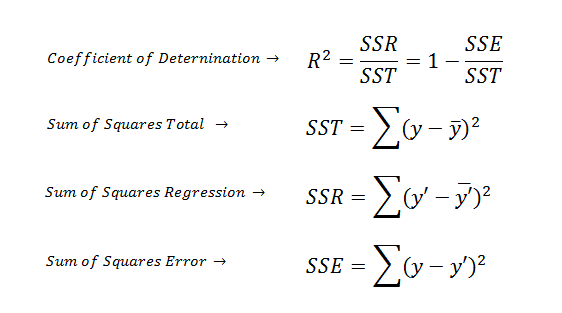

In [ ]:
from IPython.display import Image
Image('imagens/r2.png')

R2 é a fração da variância da amostra de Yi explicada (ou prevista) pelas variáveis preditoras. Para um modelo de regressão simples, esta medida mostra quanto do comportamento da variável Y é explicado pelo comportamento de variação da variável X, sempre lembrando que não existe, necessariamente, uma relação de causa e efeito entre as variáveis X e Y. Para um modelo de regressão múltipla, esta medida mostra quanto do comportamento da variável Y é explicado pela variação conjunta das variáveis X consideradas no modelo.

O coeficiente de ajuste R2 não diz aos analistas se uma determinada variável explicativa é estatisticamente significante e se esta variável é a causa verdadeira da alteração de comportamento da variável dependente.


In [3]:
#Na saida da tabela, pontos a serem observados:
# R-squared, enquanto mais perto de 1 é melhor
# coef serve como valores bases na equação y = ax+b
# P > |t| se for maior que 0.05 não é uma boa variável, pois mostra que não tem relação

import pandas as pd
import statsmodels.formula.api as smf

# Carregando o dataset
df = pd.read_csv('/content/pesos.csv')

# Criando o Modelo de Regressão
estimativa = smf.ols(formula = 'Peso ~ Idade', data = df)

# Treinando o Modelo de Regressão
modelo = estimativa.fit()

# Imprimindo o resumo do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     774.9
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           1.50e-11
Time:                        17:16:20   Log-Likelihood:                 1.3432
No. Observations:                  13   AIC:                             1.314
Df Residuals:                      11   BIC:                             2.444
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4737      0.124     27.937      0.0

# Fim

## Valeu!

### #Instagram - Ciencia dos Dados <a href="http://instagram.com/cienciadosdados">instagram.com/cienciadosdados</a>